In [5]:
from sklearn.datasets import load_iris
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# 데이터 로드

iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 판다스 데이터프레임으로 변환

In [11]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

In [15]:
print(irisDF.shape)
irisDF.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [18]:
# setosa는 세모, versicolor 네모 , virginica 동그라미 (시각화)

marker=['^', 's', 'o']

In [19]:
for i, marker in enumerate(marker):
    print(i, marker)

0 ^
1 s
2 o


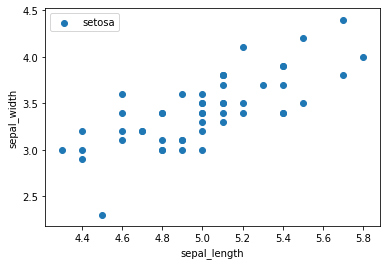

In [28]:
# 그래프 그리기
for i, marker in enumerate(marker):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']

    # scatter 평면(2차원)에 뿌려줄 것, for문을 써서 setosa, versicolor, virginica
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# PCA

In [32]:
## 스케일링

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [36]:
print(iris_scaled.shape)
iris_scaled

(150, 4)


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# PCA 변환 수행

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)

iris_pca = pca.transform(iris_scaled)

# 판다스 데이터 프레임으로 변환

In [40]:
pca_columns = ['pca_component_1', 'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)

irisDF_pca['target']= iris.target

In [41]:
print(irisDF_pca.shape)
irisDF_pca

(150, 3)


,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
5,-2.075631,1.489178,0
6,-2.444029,0.047644,0
7,-2.232847,0.223148,0
8,-2.334640,-1.115328,0
9,-2.184328,-0.469014,0


In [44]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)

[0.98039216 0.92156863 0.97916667]


In [50]:
print(np.mean(scores))

0.960375816993464


In [54]:
# iris를 pca한 데이터

pca_X = irisDF_pca[['pca_component_1','pca_component_2']]

scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print(scores_pca)
print(np.mean(scores_pca))

[0.8627451  0.84313725 0.89583333]
0.8672385620915034


PCA - 시각화할 때 좋고, 상관도가 높은 Feature들이 섞여 있는 데이터셋의 경우 feature 차이를 확인할 때 방향성을 제공해 준다.

# 신용카드 PCA 

In [55]:
import pandas as pd

In [67]:
df = pd.read_excel('C:/chosungeun/data/pca_credit_card.xls.xls', sheet_name='Data', header=1)

In [68]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [70]:
X_feature= df.drop('default payment next month', axis=1)
y_target = df['default payment next month']

In [74]:
X_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


# 히트맵으로 상관관계(correlation)를 확인해보자

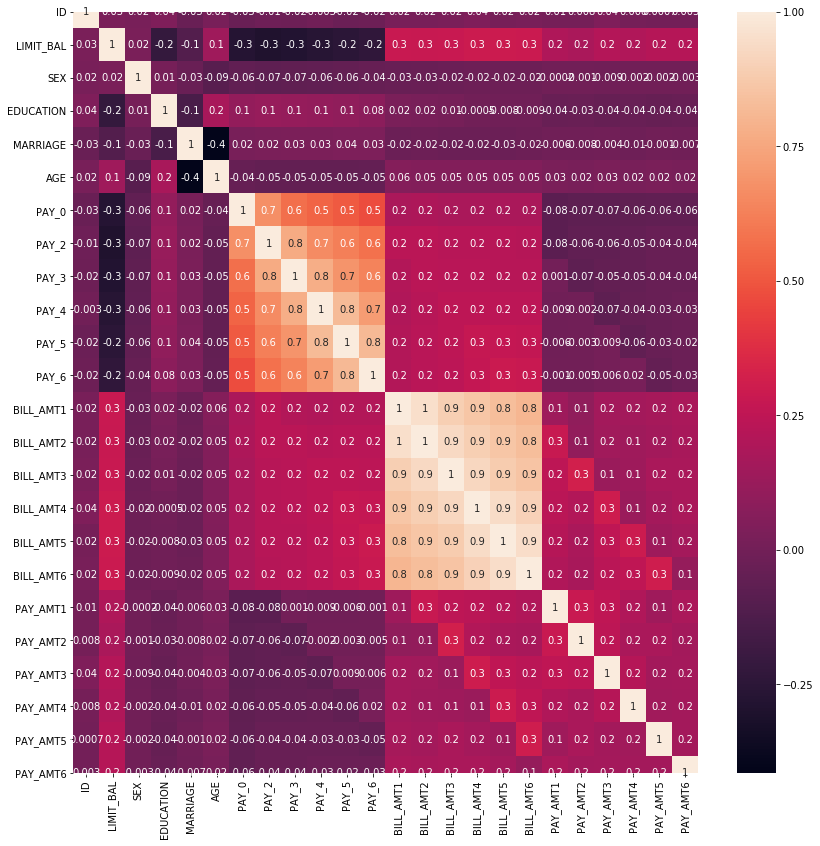

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_feature.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1_BILL_AMT6 feature를 2개의 components로 PCA 변환하기

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1_6 특성 6개 이름

cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
cols_bill

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [82]:
# 우선 스케일링해서 값을 맞춰주고
# 2개의 컴포넌트를 가진 PCA 객체 생성

In [87]:
# 스케일링

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_feature[cols_bill])

## PCA 

In [88]:
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [91]:
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

In [95]:
# 원본 데이터셋으로 랜덤포레스트

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_feature, y_target, scoring='accuracy', cv=3)
print(scores)
print(np.mean(scores))

[0.257  0.8209 0.784 ]
0.6206333333333334


# PCA 데이터셋으로 랜덤포레스트

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_feature)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scored_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print(scored_pca)
print(np.mean(scored_pca))

[0.7779 0.7978 0.8039]
0.7932
